In [1]:
import numpy as np
import pandas as pd


In [2]:
from sklearn.datasets import load_boston

In [25]:
boston = load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names

# create the dataframe

boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

C:\Users\97798\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Detect outliers with BoxPlot

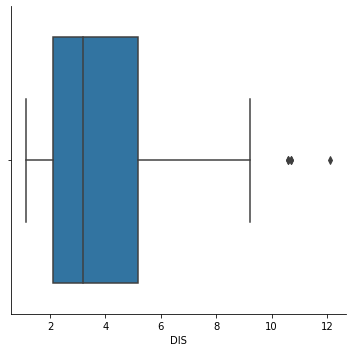

In [5]:
import seaborn as sns
sns.catplot(
    x= 'DIS',
    data= boston_df,
    kind = 'box'
)

scatter plot

<AxesSubplot:xlabel='INDUS', ylabel='TAX'>

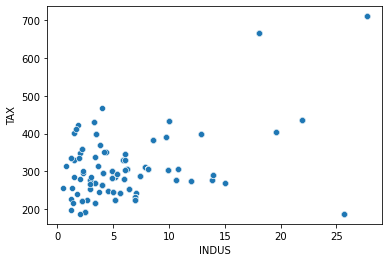

In [6]:
sns.scatterplot(
    x= 'INDUS',
    y = 'TAX',
    data = boston_df
)

Z Score

In [7]:
from scipy import stats

z = np.abs(stats.zscore(boston_df))
print(z)

         CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0    0.419782  0.284830  1.287909  0.272599  0.144217  0.413672  0.120013   
1    0.417339  0.487722  0.593381  0.272599  0.740262  0.194274  0.367166   
2    0.417342  0.487722  0.593381  0.272599  0.740262  1.282714  0.265812   
3    0.416750  0.487722  1.306878  0.272599  0.835284  1.016303  0.809889   
4    0.412482  0.487722  1.306878  0.272599  0.835284  1.228577  0.511180   
..        ...       ...       ...       ...       ...       ...       ...   
501  0.413229  0.487722  0.115738  0.272599  0.158124  0.439316  0.018673   
502  0.415249  0.487722  0.115738  0.272599  0.158124  0.234548  0.288933   
503  0.413447  0.487722  0.115738  0.272599  0.158124  0.984960  0.797449   
504  0.407764  0.487722  0.115738  0.272599  0.158124  0.725672  0.736996   
505  0.415000  0.487722  0.115738  0.272599  0.158124  0.362767  0.434732   

          DIS       RAD       TAX   PTRATIO         B     LSTAT  
0    0.14

In [8]:
threshold = 3
print(np.where(z > 3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

In [12]:
boston_df.std()

CRIM         8.601545
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
dtype: float64

IQR RANGE

In [13]:
boston_df_01 = boston_df

In [14]:
q1 = boston_df_01.quantile(0.25)
q3 = boston_df_01.quantile(0.75)

iqr = q3-q1
print(iqr)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


In [15]:
boston_df_out = boston_df_01[~((boston_df_01<(q1-1.5*iqr))|(boston_df_01 > (q3 + 1.5*iqr)))]

In [16]:
boston_df.shape

(506, 13)

In [17]:
boston_df_01.shape

(506, 13)

In [18]:
boston_df_out.shape

(506, 13)

In [23]:
def remove_outliers(df):
    outliers = {}
    for col in df.columns:
        if str(df[col].dtype) != 'object':
            df = df[np.abs(df[col]-df[col].mean()) < (3*df[col].std())]
            olrs = df[~(np.abs(df[col]-df[col].mean()) < (3*df[col].std()))]
            outliers = pd.DataFrame(olrs)
    
    return print('These outliers have been removed from your dataset: \n\n', outliers,
                'New shape is:', df.shape)

In [24]:
remove_outliers(boston_df)

These outliers have been removed from your dataset: 

         CRIM   ZN  INDUS  CHAS  NOX   RM   AGE     DIS   RAD    TAX  PTRATIO  \
387  22.5971  0.0   18.1   0.0  0.7  5.0  89.5  1.5184  24.0  666.0     20.2   

         B  LSTAT  
387  396.9  31.99   New shape is: (412, 13)


Automatic outlier detection

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
data = boston_df.values

X, y = data[:,:-1], data[:,-1]

print(X.shape, y.shape)

(506, 12) (506,)


In [30]:
Xtrain, xtest, Ytrain , ytest = train_test_split(X, y , test_size=0.33,
                                                random_state=1)

print(Xtrain.shape, xtest.shape, Ytrain.shape, ytest.shape)

(339, 12) (167, 12) (339,) (167,)


In [31]:
model = LinearRegression()

model.fit(Xtrain, Ytrain)

yhat = model.predict(xtest)

mae = mean_absolute_error(ytest, yhat)
print('mae: %.3f' %mae)

mae: 3.018


Local Outlier Detector


In [33]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
yhat = lof.fit_predict(Xtrain)

# select all rows that are not outliers
mask = yhat!= -1
Xtrain, Ytrain = Xtrain[mask, :], Ytrain[mask]

In [34]:
print(Xtrain.shape, Ytrain.shape)

model = LinearRegression()

model.fit(Xtrain, Ytrain)

yhat = model.predict(xtest)

mae = mean_absolute_error(ytest, yhat)
print('\nMAE: %.3f' %mae) 

(298, 12) (298,)

MAE: 2.997
